In [137]:
import numpy as np
import matplotlib.pyplot as plt

#  Импортируем модуль для работы с анимацией:
import matplotlib.animation as animation

# from mpl_toolkits.mplot3d.axes3d import get_test_data
from matplotlib import cm

In [36]:
# Зададим размеры массивов пространства (расчётной области)
Nx = 100
Ny = 200

# Задаём шаги по пространству и времени
dx = 1
dy = 1

dt= 1e-9 # условие устойчивости метода (условие Куранта)

imp0 = 120 * np.pi # сопротивление свободного пространства
mu0 = 4*np.pi * 1e-7
eps0 = mu0 / (imp0 * imp0)

eps = 1
mu = 1

eps_a = eps0 * eps
mu_a = mu0 * mu


# Координаты источника, коэффициент относительно длин массивов
i_source = 0.75
j_source = 0.3

tau = 100*dt # длительность импульса по времени

In [208]:
# Зададим функцию для источника

def Gauss(t):
    return np.exp(-t*t)

def Source(t, tau):
    return Gauss((t-tau)/(tau/3)) # Тройка в знаменателе отвечает за крутизну фронта - чем больше число, тем круче импульс

t = np.arange(0, 400*dt, dt) # параметр тау влияет на фронт импульса (длительность)
s = Source(t, 100*dt)

# plt.style.use('seaborn')
# plt.plot(t, s)
# plt.show()

In [206]:
c_HE = dt / mu_a # константа для поля H для расчёта с полем E
c_EH = dt / eps_a # константа для поля Е для расчёта с полем H


def UpdateH(Hx, Hy, Hz, Ex, Ey, Ez):
    for i in range(0, Nx-1):
        for j in range(0, Ny-1):
            Hx[i,j] = Hx[i,j] - c_HE * (+(Ez[i, j+1] - Ez[i,j])) / dy
            Hy[i,j] = Hy[i,j] - c_HE * (-(Ez[i+1, j] - Ez[i,j])) / dx
            Hz[i,j] = Hz[i,j] - c_HE * ((Ey[i+1, j] - Ey[i,j]) / dx - (Ex[i, j+1] - Ex[i,j]) / dy)

def UpdateE(Hx, Hy, Hz, Ex, Ey, Ez):
    for i in range(1, Nx):
        for j in range(1, Ny):
            Ex[i,j] = Ex[i,j] + c_EH * (+(Hz[i,j] - Hz[i, j-1])) / dy
            Ey[i,j] = Ey[i,j] + c_EH * (-(Hz[i,j] - Hz[i-1, j])) / dx
            Ez[i,j] = Ez[i,j] + c_EH * ((Hy[i,j] - Hy[i-1, j]) / dx - (Hx[i,j] - Hx[i, j-1]) / dy)

def SetSourceEz(Ez, t: float):
    i = int(i_source * len(Ez))
    j = int(j_source * len(Ez[0]))
    Ez[i][j] += c_EH * Source(t, tau)

def GetField(Nt: int):
    Ex = np.zeros((Nx, Ny), dtype = float)
    Ey = np.zeros((Nx, Ny), dtype = float)
    Ez = np.zeros((Nx, Ny), dtype = float)

    Hx = np.zeros((Nx, Ny), dtype = float)
    Hy = np.zeros((Nx, Ny), dtype = float)
    Hz = np.zeros((Nx, Ny), dtype = float)

    Ez_result = []

    for n in range(0, Nt, 1):
        UpdateH(Hx, Hy, Hz, Ex, Ey, Ez)
        UpdateE(Hx, Hy, Hz, Ex, Ey, Ez)
        SetSourceEz(Ez, n*dt)
        Ez_result.append(np.copy(Ez))

    return Ez_result

In [209]:
n_time = 700
Ez = GetField(n_time)

In [227]:
vmin1, vmax1 = 0.45* np.min(Ez), 0.45* np.max(Ez)

print(vmin1, vmax1)

-7.8384188857254 9.983099075085269


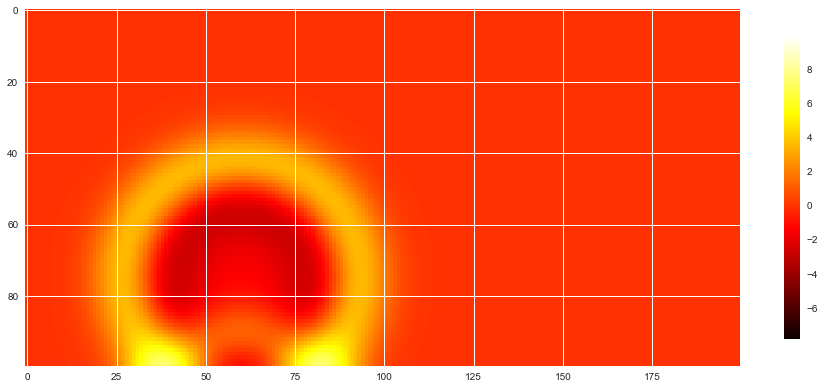

In [228]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (16,8))
im = ax.imshow(Ez[n_time-500], cmap = 'hot', vmin = vmin1, vmax = vmax1)

fig.colorbar(im, shrink=0.7, aspect=20)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


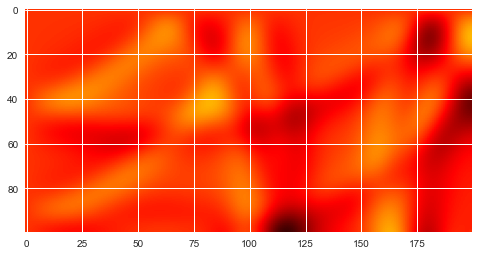

In [229]:
fig, ax = plt.subplots()

ims = []
for i in range(len(Ez)):
    im = ax.imshow(Ez[i], cmap = 'hot', animated=True, vmin = vmin1, vmax = vmax1)
    if i == 0:
        ax.imshow(Ez[0])  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
ani.save("Ez1.gif")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()

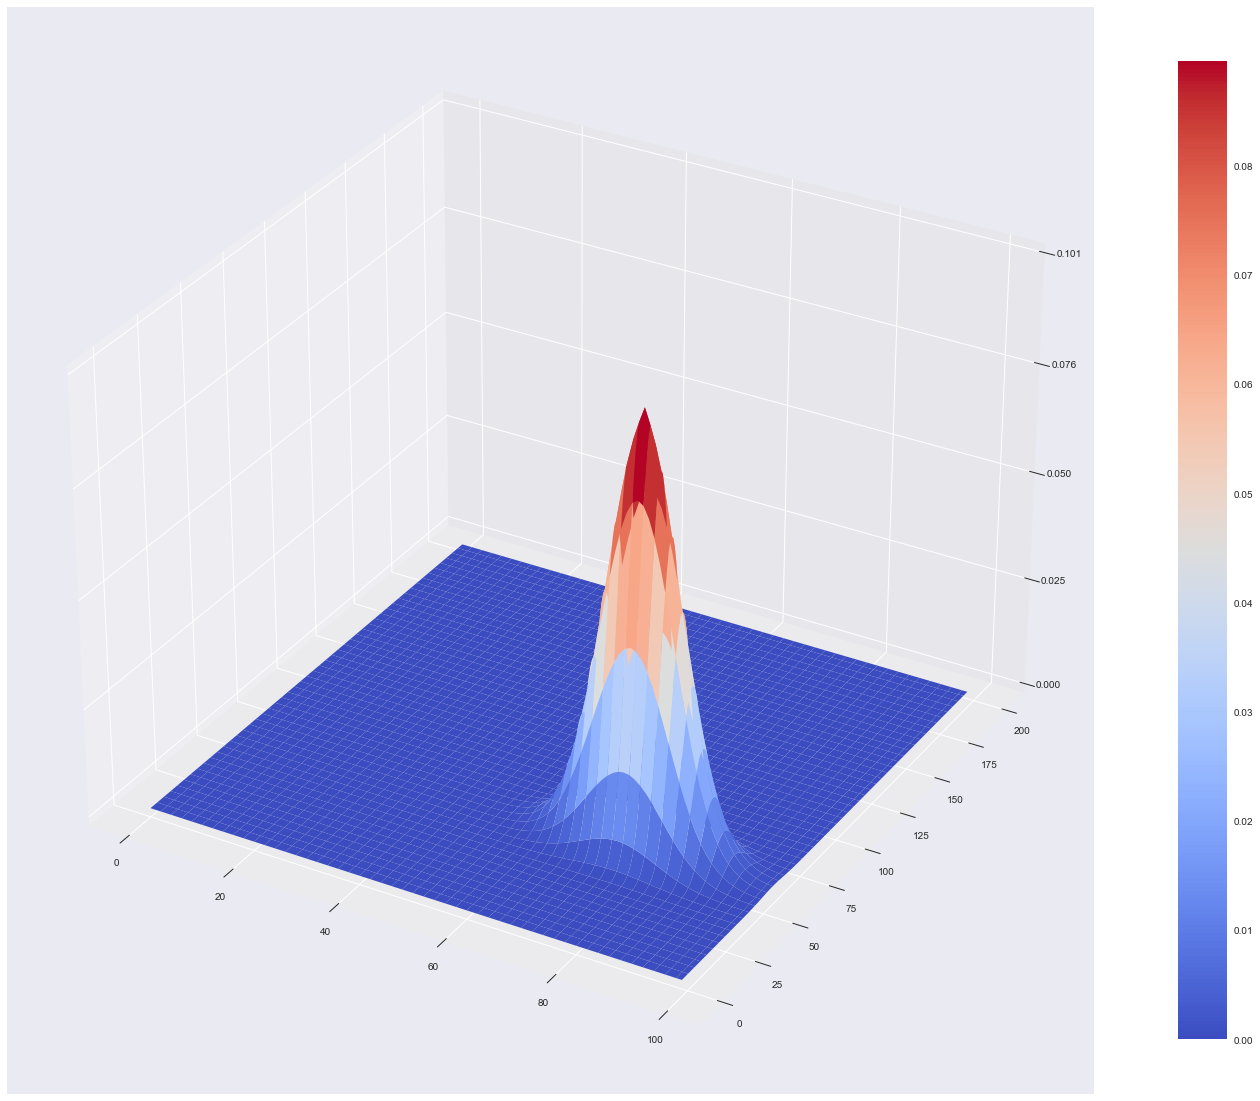

In [148]:
from matplotlib.ticker import LinearLocator

X = np.arange(0, Nx, dx)
Y = np.arange(0, Ny, dy)
Y, X = np.meshgrid(Y, X)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (30,20))

# Plot the surface.
surf = ax.plot_surface(X, Y, Ez, cmap=cm.coolwarm,
                       linewidth=1, antialiased=True)

# Customize the z axis.
ax.set_zlim(1.01*np.min(Ez), 1.01*np.max(Ez)) # пределы оси
ax.zaxis.set_major_locator(LinearLocator(5)) # количество делений по оси z
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.03f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.9, aspect=20)

plt.show()

In [146]:
a = np.ones((5,5))
b = np.copy(a)
b[2,3] = 0
a

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])